### 0. IMPORT

In [3]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import math

data_=pd.read_csv('인사이콘3_Data.csv')
data_.head()

,RESPID,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,...,Q16.20,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27,Q17,Q18
0,23822,5,1,5,5,5,5,5,3,5,...,4,4,4,4,5,4,4,4,0,1
1,224795,3,2,4,4,4,4,5,3,4,...,4,3,3,4,3,3,3,3,1,1
2,20952,3,1,4,4,5,4,4,2,4,...,5,3,3,5,2,4,3,5,1,0
3,5612,5,2,3,4,5,5,3,3,3,...,4,4,4,4,2,5,5,4,1,0
4,15016,4,2,4,5,5,4,5,4,5,...,4,4,5,5,3,4,5,4,0,0


### 1. 데이터 전처리

여기서는 'Q1.14', 'Q2', 'Q3', 'Q4', 'Q8', 'Q9.3', 'Q15', 'Q16.26', 'Q17', 'Q18'만 뽑아서 진행할 예정입니다! (이유는 묻지 마세욧)

하지만, 여러분에게는 해당 컬럼을 선택한 이유가 있어야겠죠...?

여기서 그 부분은 생략하겠습니다...

In [302]:
data_cleaning = data_.copy()

#불필요한 칼럼 drop
data_cleaning = data_cleaning[['Q1.14','Q2','Q3','Q4','Q8','Q9.3','Q15','Q16.26','Q17','Q18']]

#데이터 정규화
scaler = StandardScaler()
data_cleaning[:] = scaler.fit_transform(data_cleaning[:])
data_cleaning.head()

,Q1.14,Q2,Q3,Q4,Q8,Q9.3,Q15,Q16.26,Q17,Q18
0,1.806394,0.125422,-0.215617,3.074166,0.859211,0.293257,-0.474762,0.137651,-0.709559,1.003205
1,0.776731,0.125422,-0.215617,-0.397732,-0.387288,0.293257,-1.346503,-1.188421,1.409326,1.003205
2,1.806394,0.125422,1.204830,0.470243,0.859211,0.293257,-1.346503,-1.188421,1.409326,-0.996806
3,1.806394,0.125422,-0.215617,0.904230,-0.387288,0.293257,-1.346503,1.463723,1.409326,-0.996806
4,0.776731,0.125422,-0.215617,0.470243,-0.387288,-0.747009,-1.346503,1.463723,-0.709559,-0.996806


### 2. PCA

여기서는 PCA를 진행해서 이를 이용해 군집화를 진행했습니다!

+) PCA과정은 필수는 아니지만, 권장입니다..! (군집화 외에도 이전에 배운 내용을 다양하게 활용하셨으면 하는 마음에서...ㅎㅎ)

In [303]:
data_pca = data_cleaning.copy()

<AxesSubplot:>

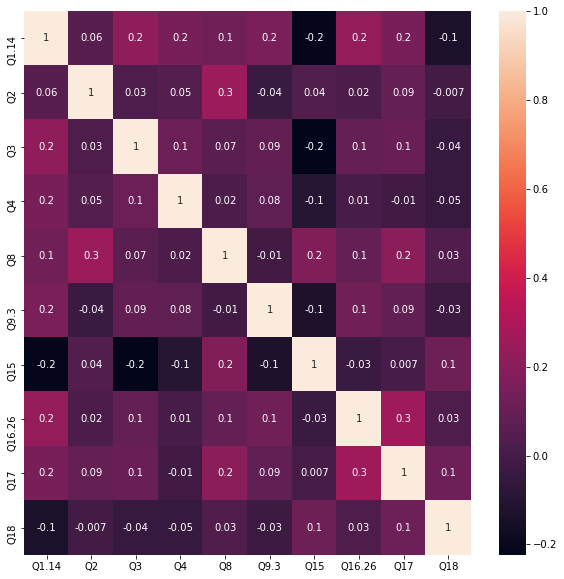

In [304]:
%matplotlib inline
corr = data_pca.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,fmt='.1g')

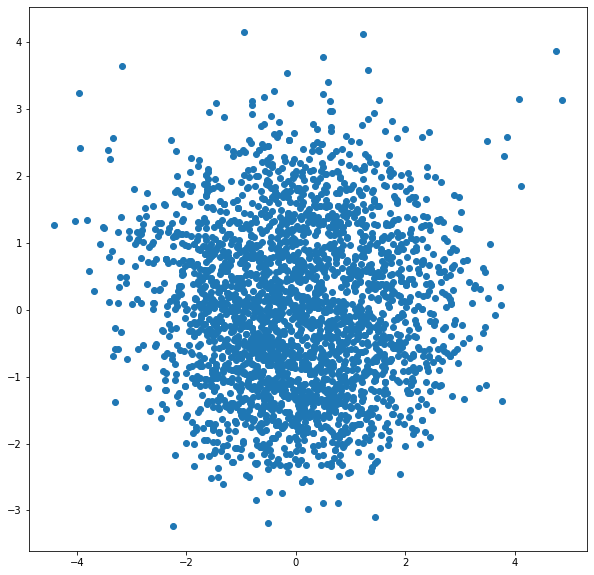

In [305]:
#시각화를 위해 차원축소
pca = PCA(n_components=2)
pca.fit(data_pca)
pca_transformed = pca.transform(data_pca)

data_pca['pca_x'] = pca_transformed[:,0]
data_pca['pca_y'] = pca_transformed[:,1]

#데이터 살펴보기
plt.figure(figsize=(10,10))
plt.scatter(data_pca['pca_x'],data_pca['pca_y'])

In [306]:
print("PCA 주성분 형태: {}".format(pca.components_.shape))

PCA 주성분 형태: (2, 10)


Text(0, 0.5, 'pc')

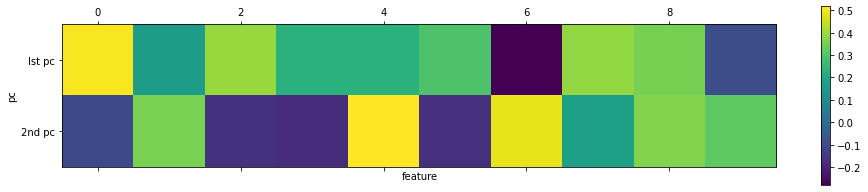

In [307]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["lst pc", "2nd pc"])
plt.colorbar()
plt.xlabel("feature")
plt.ylabel("pc")

## 군집화

저희 주최측에서는 아주 간단하게 군집화를 진행해보았습니다..^^

In [308]:
data_pca.iloc[:,-2:]

,pca_x,pca_y
0,1.688472,-0.399053
1,0.560176,-0.203648
2,2.315136,-0.691104
3,2.602735,-0.718434
4,0.917053,-1.139863
...,...,...
2808,1.866841,0.923998
2809,-2.910407,1.162811
2810,-0.947803,-0.246310
2811,-0.253069,-2.735763


In [309]:
#fit을 수행하여 데이터에 대한 군집화 수행 결과가 kmeans 객체 변수로 반환
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)
#kmeans.fit(data_pca)
kmeans.fit(data_pca.iloc[:,-2:])

KMeans(n_clusters=3, random_state=0)

In [310]:
print(kmeans.labels_)

[2 2 2 ... 0 1 0]


In [311]:
#군집화가 효과적으로 됐는지 확인
data_pca['cluster'] = kmeans.labels_

In [312]:
data_pca.head()

,Q1.14,Q2,Q3,Q4,Q8,Q9.3,Q15,Q16.26,Q17,Q18,pca_x,pca_y,cluster
0,1.806394,0.125422,-0.215617,3.074166,0.859211,0.293257,-0.474762,0.137651,-0.709559,1.003205,1.688472,-0.399053,2
1,0.776731,0.125422,-0.215617,-0.397732,-0.387288,0.293257,-1.346503,-1.188421,1.409326,1.003205,0.560176,-0.203648,2
2,1.806394,0.125422,1.204830,0.470243,0.859211,0.293257,-1.346503,-1.188421,1.409326,-0.996806,2.315136,-0.691104,2
3,1.806394,0.125422,-0.215617,0.904230,-0.387288,0.293257,-1.346503,1.463723,1.409326,-0.996806,2.602735,-0.718434,2
4,0.776731,0.125422,-0.215617,0.470243,-0.387288,-0.747009,-1.346503,1.463723,-0.709559,-0.996806,0.917053,-1.139863,1


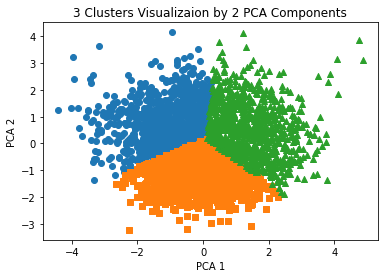

In [313]:
#군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = data_pca[data_pca['cluster']==0].index
marker1_ind = data_pca[data_pca['cluster']==1].index
marker2_ind = data_pca[data_pca['cluster']==2].index


#군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출, o,s,^로 마커 표시
plt.scatter(x=data_pca.loc[marker0_ind, 'pca_x'], y=data_pca.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=data_pca.loc[marker1_ind, 'pca_x'], y=data_pca.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=data_pca.loc[marker2_ind, 'pca_x'], y=data_pca.loc[marker2_ind, 'pca_y'], marker='^')


plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualizaion by 2 PCA Components')
plt.show()

## 실루엣 계수

__DBSCAN은 실루엣 계수를 구할 수 없습니다! 만약 DBSCAN을 쓰고 싶다면 분석 내용 안에 포함시켜주세요.__

In [314]:
print(silhouette_score(data_pca.iloc[:,-3:-1], kmeans.labels_))

0.35217023980902307


### +) 참고용 코드

아래는 군집화를 진행할 때 참고하실만한 코드입니다!

여러개의 경우에서 각각의 클러스터 개수에 대한 실루엣 계수를 뽑고, 최종적으로 cluster의 개수를 결정할 수 있는 코드입니다!

In [315]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

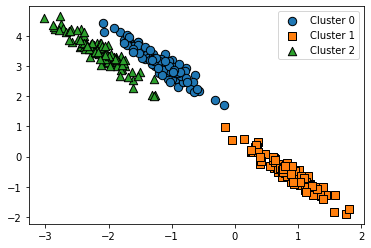

In [316]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples = 300, n_features=2, centers=3, cluster_std=0.5, random_state = 0)
transformation =[[0.60834549, -0.63667341], [-0.40887718, 0.85253229]] #gmm과 kmeans 비교를 위해 데이터 타원 모양으로 조정
X_aniso = np.dot(X, transformation)
clusterDF = pd.DataFrame(data=X_aniso, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

In [317]:
from sklearn.cluster import KMeans

#실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [318]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(clustering, X_features, cluster_lists=[1]): 
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        if clustering[0] == 'kmeans':
            model = KMeans(n_clusters=n_cluster)
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        cluster_labels = model.fit_predict(X_features)
  
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([-1, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [319]:
params = {'n_clusters':[2, 3, 4, 5, 6, 7]}

scores_kmeans = {}
for n_cluster in params['n_clusters']:
    model = KMeans(n_clusters=n_cluster)
    model.fit(clusterDF.iloc[:,:-1])
    score = silhouette_score(clusterDF.iloc[:,:-1], model.labels_)
    scores_kmeans['_'.join(['original', str(n_cluster)])] = score


pd.Series(scores_kmeans).sort_values(ascending=False)[:10]

original_2    0.795179
original_3    0.610730
original_4    0.505587
original_5    0.440890
original_7    0.426933
original_6    0.425604
dtype: float64

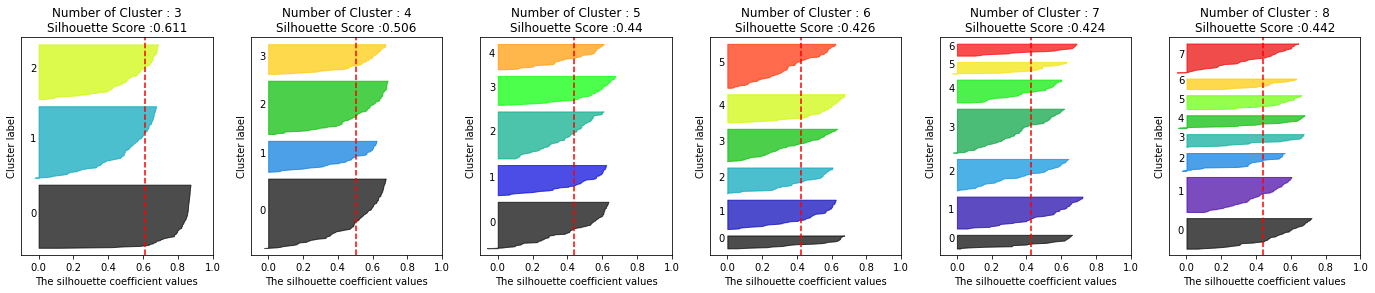

In [320]:
visualize_silhouette(['kmeans'], clusterDF.iloc[:,:-1], [3, 4, 5, 6, 7, 8])

## 리더보드용 Submission

위에서 진행한 군집화에 대해서, 실루엣계수가 가장 높았던 모델을 찾으셨나요?

pickle로 해당 "모델"과 "데이터"을 저장해서 제출해주세요!

아래의 코드를 따라 진행해주시면 됩니다.

In [75]:
best_model = kmeans
best_data = data_pca.iloc[:,-3:-1]

저희 주최측에서는 1.군집화에서 진행한 kmeans와 그때의 데이터를 저장하려 합니다.

In [76]:
import pickle

with open('OOO_submission_test1_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
    
with open('OOO_submission_test1_data.pkl', 'wb') as f:
    pickle.dump(best_data, f)

리더보드용 제출은 test1으로

최종 제출은 test2로 제출해주시면 됩니다! (OOO에는 팀이름 적기 ㅎㅅㅎ)

저희 주최측에서 나온 실루엣 계수는 그리 높지 않지만....

여러분은 더 좋은 모델을 찾으실 수 있을거라 믿습니다! ㅎㅎㅎ

인사이콘 3회 파이팅! (,,ԾㅂԾ,,)